# Project: What university-level factors predict and affect the  graduation rate?

## Definition


In this project, I will apply supervised learning techniques to identify what university-level factors predict and affect the  graduation rate. These factors can then be used to help universities and students improve the graduation rate. Addiionally, It can help students make better decisions about which universities to attend that would help them best achieve the goals they are looking for.  

The data is provided by College Scorecard  data.

https://collegescorecard.ed.gov/data/


### Problem statement

For the purposes of this task, we are going to look at the completion rates for first-time,full-tume students at four year institutions and less than four year insitutions. 



completion.completion_rate_4yr_100nt:
    source: C100_4
    type: float
    description: Completion rate for first-time, full-time students at four-year institutions
      (100% of expected time to completion)
      
completion.completion_rate_less_than_4yr_100nt:
    source: C100_L4
    type: float
    description: Completion rate for first-time, full-time students at less-than-four-year
      institutions (100% of expected time to completion)
      
 
The pooled suppressed data and outcome data could not be used becuase they are only available in the lastest year and I wanted more data and used data from various years.

The following tasks will be performed:

*Investigate and process the data
*Evaluate 3 regression algorithms and select the best performing
*select the features that best predict the completion rate



#### Metrics

The quality of a regression model is how well its predictions match up against actual values and error metrics are used to judge the quality of a model and enable us to compare regressions against other regressions with different parameters²

To Evaluate the 3 regression algorithms mentioned above, I will be using the Root Mean square error. The mean square error (MSE) calculates the residual for every data point, squares the differences and summing them all.

The Root mean squared error (RMSE) is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. I prefer to use RMSE to convert the error metric back into units used for the graduation rates, making interpretation easier.

## Analysis

In [201]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import ast
from sklearn.linear_model import LinearRegression ##Includes Logistic Regression, which will be tested for predictive capability
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.decomposition  ##Includes Principal Component Analysis, a method of dimensionality reduction
from sklearn.pipeline import Pipeline ##Convenient module for calculating PCs and using them in logistic regression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation

# magic word for producing visualizations in notebook
%matplotlib inline

### Data exploration

### Step 0: Load the Data

There are 3 files associated with this project (not including this one):

- `MERGED2016_17_PP.csv`: College scoreboard data from 2016-2017; 7175 institutions (rows) x 1899 features (columns).
- `MERGED2015_16_PP.csv` : College scoreboard data from 2015-2016; 7593 institutions  (rows) x 1899 features (columns).
- `MERGED2014_15_PP.csv`: College scoreboard data from 2014-2015; 7703 institutions  (rows) x 1899 features (columns).
- `MERGED2013_14_PP.csv`: College scoreboard data from 2013-2014; 7804 (institutions  x 1899 features (columns).
- `MERGED2012_13_PP.csv`: College scoreboard data from 2012-2013; 7793 institutions (rows) x 1899 features (columns).
- `MERGED2011_12_PP.csv`, College scoreboard data from 2011-2012; 7675 institutions (rows) x 1899 features (columns)
- `MERGED2010_11_PP.csv`, College scoreboard data from 2010-2011; 7414 institutions (rows) x 1899 features (columns)
- `MERGED2009_10_PP.csv`, College scoreboard data from 2009-2010; 7149 institutions (rows) x 1899 features (columns)
- `MERGED2008_09_PP.csv`, College scoreboard data from 2008-2009; 6975 institutions (rows) x 1899 features (columns)
- `MERGED2007_08_PP.csv`, College scoreboard data from 2007-2008; 6890 institutions (rows) x 1899 features (columns)

- `data.yml.`: Detailed information file about the features in the provided datasets - which also provides the expected data type of each column.

Each row of the score card data includes the follwing information for each year:



In [202]:
# Load in the data.
college_data16_17 = pd.read_csv("MERGED2016_17_PP.csv", low_memory=False)
college_data15_16 = pd.read_csv("MERGED2015_16_PP.csv", low_memory=False)
college_data14_15 = pd.read_csv("MERGED2014_15_PP.csv", low_memory=False)
college_data13_14 = pd.read_csv("MERGED2013_14_PP.csv", low_memory=False)
college_data12_13 = pd.read_csv("MERGED2012_13_PP.csv", low_memory=False)



In [203]:
college_data11_12 = pd.read_csv("MERGED2011_12_PP.csv", low_memory=False)
college_data10_11 = pd.read_csv("MERGED2010_11_PP.csv", low_memory=False)
college_data09_10 = pd.read_csv("MERGED2009_10_PP.csv", low_memory=False)
college_data08_09 = pd.read_csv("MERGED2008_09_PP.csv", low_memory=False)
college_data07_08 = pd.read_csv("MERGED2007_08_PP.csv", low_memory=False)

In [204]:
college_data16_17.shape

(7175, 1899)

In [205]:
college_data15_16.shape

(7593, 1899)

In [206]:
len(college_data15_16['UNITID'].unique().tolist())

7593

In [207]:
college_data14_15.shape

(7703, 1899)

In [208]:
college_data13_14.shape

(7804, 1899)

In [209]:
college_data12_13.shape

(7793, 1899)

In [210]:
college_data11_12.shape

(7675, 1899)

In [211]:
college_data10_11.shape


(7414, 1899)

In [212]:
college_data09_10.shape

(7149, 1899)

In [213]:
college_data07_08.shape

(6890, 1899)

In [214]:
college_data08_09.shape

(6975, 1899)

In [215]:
#join the dataframes

merged_df = pd.concat([college_data07_08,college_data08_09,college_data09_10,college_data10_11,college_data11_12,college_data12_13, college_data13_14,college_data14_15,college_data15_16,college_data16_17], ignore_index=True)

In [216]:
merged_df.shape

(74171, 1899)

In [217]:
merged_df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,00100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,00105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,02503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,00105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,00100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
print (merged_df.dtypes)


UNITID                          int64
OPEID                          object
OPEID6                          int64
INSTNM                         object
CITY                           object
STABBR                         object
ZIP                            object
ACCREDAGENCY                   object
INSTURL                        object
NPCURL                         object
SCH_DEG                       float64
HCM2                          float64
MAIN                            int64
NUMBRANCH                       int64
PREDDEG                         int64
HIGHDEG                         int64
CONTROL                       float64
ST_FIPS                       float64
REGION                        float64
LOCALE                        float64
LOCALE2                       float64
LATITUDE                      float64
LONGITUDE                     float64
CCBASIC                       float64
CCUGPROF                      float64
CCSIZSET                      float64
HBCU        

In [219]:
### Look at the data dictonary of the features
!cat data.yaml


---
version: Sept18-2018-10-13-20:01-0500
api: schools
index: school-data
unique:
- id
options:
  columns: all
  search: dictionary_only
null_value:
- 'NULL'
- PrivacySuppressed
examples:
- name: College Scorecard Search results
  description: search by name starting with "arizona", sort by percentage of student
    who do better than a high school graduate ($25K/year salary), 6 years after entry
  params: _sort=latest.earnings.6_yrs_after_entry.percent_greater_than_25000%3Adesc&school.name=arizona&school.degrees_awarded.predominant__range=2..3&school.operating=1&_fields=id%2Cschool.name%2Cschool.city%2Cschool.state%2Clatest.student.size%2Cschool.ownership%2Cschool.degrees_awarded.predominant%2Clatest.cost.avg_net_price.overall%2Clatest.completion.rate_suppressed.overall%2Clatest.earnings.10_yrs_after_entry.median%2Clatest.earnings.6_yrs_after_entry.percent_greater_than_25000%2Cschool.under_investigation
- name: Completion Rate
  description: schools with a graduation rate of 95% and a

    source: FEMALE_WDRAW_4YR_TRANS_YR4_RT
    type: float
    description: Percent of female students who transferred to a 4-year institution
      and withdrew within 4 years
  completion.title_iv.female.transf_withdrawn_2yr_by.4yrs:
    source: FEMALE_WDRAW_2YR_TRANS_YR4_RT
    type: float
    description: Percent of female students who transferred to a 2-year institution
      and withdrew within 4 years
  completion.title_iv.female.still_enrolled_by.4yrs:
    source: FEMALE_ENRL_ORIG_YR4_RT
    type: float
    description: Percent of female students who were still enrolled at original institution
      within 4 years
  completion.title_iv.female.transf_still_enrolled_4yr_by.4yrs:
    source: FEMALE_ENRL_4YR_TRANS_YR4_RT
    type: float
    description: Percent of female students who transferred to a 4-year institution
      and were still enrolled within 4 years
  completion.title_iv.female.transf_still_enrolled_2yr_by.4yrs:
    source: FEMALE_ENRL_2YR_TRANS_YR4_RT
    type: float


    description: Adjusted cohort count for those who did not receive a Direct Subsidized
      Loan or a Pell Grant completion rate at four-year institutions (denominator
      of 150% did not receive a Direct Subsidized Loan or Pell Grant completion rate)
  completion.completion_rate_lt_four_year_150_noloan_nopell:
    source: C150_L4_NOLOANNOPELL
    type: float
    description: Completion rate for first-time, full-time students receiving neither
      a Direct Subsidized Loan or a Pell Grant during their first year of college
      at less-than-four-year institutions (150% of expected time to completion)
  completion.completion_cohort_lt_four_year_150_noloan_nopell:
    source: D150_L4_NOLOANNOPELL
    type: integer
    description: Adjusted cohort count for those who did not receive a Direct Subsidized
      Loan or a Pell Grant completion rate at less-than-four-year institutions (denominator
      of 150% did not receive a Direct Subsidized Loan or Pell Grant completion rate)
  co

In [220]:
## Check the number of float columns
print (len(list(merged_df.columns[(merged_df.dtypes.values == np.dtype('float64'))])))

585


In [221]:
## Check the number of float columns
print (len(list(merged_df.columns[(merged_df.dtypes.values == np.dtype('int64'))])))

6


In [222]:
## Check the number of float columns
print (len(list(merged_df.columns[(merged_df.dtypes.values == np.dtype('object'))])))

1308


In [223]:
## Summary statistics

print(merged_df.describe())

         UNITID    OPEID6   SCH_DEG     HCM2      MAIN  NUMBRANCH   PREDDEG  \
count  7.42e+04  74171.00  66065.00  7175.00  74171.00   74171.00  74171.00   
mean   1.35e+06  15598.47      1.92     0.01      0.76       6.03      1.84   
std    5.73e+06  13320.44      0.88     0.10      0.43      18.57      1.02   
min    1.01e+05   1002.00      1.00     0.00      0.00       1.00      0.00   
25%    1.70e+05   3329.00      1.00     0.00      1.00       1.00      1.00   
50%    2.22e+05  10387.00      2.00     0.00      1.00       1.00      2.00   
75%    4.40e+05  25476.00      3.00     0.00      1.00       2.00      3.00   
max    4.88e+07  42580.00      3.00     1.00      1.00     142.00      4.00   

        HIGHDEG   CONTROL   ST_FIPS       ...         OMAWDP6_PTNFT_POOLED  \
count  74171.00  74148.00  74170.00       ...                      3105.00   
mean       2.20      2.18     29.08       ...                         0.37   
std        1.31      0.84     16.64       ...         

In [224]:
## describe the data by dtypes - object

merged_df.describe(include=['object'])

,OPEID,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,DEATH_YR2_RT,COMP_ORIG_YR2_RT,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
count,74171,74171,74171,74171,74171,6682,7163,6675,65206,65206,...,3774,3774,3774,3774,3774,3105,3105,3105,3105,3105
unique,16895,8865,2725,59,7567,41,5980,5366,324,26409,...,2462,2439,374,1946,2311,1720,1718,439,1507,1712
top,104700,McCann School of Business & Technology,New York,CA,85021,Higher Learning Commission,www.empire.edu,www.empire.edu/net-price-calculator,PrivacySuppressed,PrivacySuppressed,...,PrivacySuppressed,PrivacySuppressed,0,0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
freq,17,79,879,7423,79,1229,83,82,61351,11173,...,459,459,1471,537,459,907,907,907,907,907


#### Notes


Loooking at these columns, it is clear that a lot of the object columns are actually float or numeric columns but because some values are "Privacy Suppressed" , they have have recorded as object or string columns. 

Checking the object columns above against the data dictionary provided it is clear that most of them are either integer or float. I will have to investigate  these columns in the pre-processing stage and change all of the "Privacy Suppressed" data to Nan.

In [225]:
## describe the data by dtypes - object

merged_df.describe(include=['int64'])

,UNITID,OPEID6,MAIN,NUMBRANCH,PREDDEG,HIGHDEG
count,7.42e+04,74171.00,74171.00,74171.00,74171.00,74171.00
mean,1.35e+06,15598.47,0.76,6.03,1.84,2.20
std,5.73e+06,13320.44,0.43,18.57,1.02,1.31
min,1.01e+05,1002.00,0.00,1.00,0.00,0.00
25%,1.70e+05,3329.00,1.00,1.00,1.00,1.00
50%,2.22e+05,10387.00,1.00,1.00,2.00,2.00
75%,4.40e+05,25476.00,1.00,2.00,3.00,4.00
max,4.88e+07,42580.00,1.00,142.00,4.00,4.00


In [226]:
## describe the data by dtypes - object

merged_df.describe(include=['float64'])

,SCH_DEG,HCM2,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,...,OMAWDP6_PTNFT_POOLED,OMACHT8_PTNFT_POOLED,OMAWDP8_PTNFT_POOLED,OMENRYP8_PTNFT_POOLED,OMENRAP8_PTNFT_POOLED,OMENRUP8_PTNFT_POOLED,poolyrsOM_FTFT,poolyrsOM_PTFT,poolyrsOM_FTNFT,poolyrsOM_PTNFT
count,66065.00,7175.00,74148.00,74170.00,74170.00,6737.00,0.0,6737.00,6737.00,6737.00,...,3105.00,3973.00,3105.00,3.10e+03,3105.00,3105.00,7175.0,7175.0,7175.0,7175.0
mean,1.92,0.01,2.18,29.08,4.59,19.72,NaN,37.36,-90.28,9.66,...,0.37,308.83,0.39,1.67e-02,0.18,0.41,2.0,2.0,2.0,2.0
std,0.88,0.10,0.84,16.64,2.17,9.49,NaN,5.85,17.80,11.09,...,0.23,1265.00,0.23,4.94e-02,0.18,0.24,0.0,0.0,0.0,0.0
min,1.00,0.00,1.00,1.00,0.00,-3.00,NaN,-14.32,-170.74,-2.00,...,0.00,0.00,0.00,0.00e+00,0.00,0.00,2.0,2.0,2.0,2.0
25%,1.00,0.00,1.00,13.00,3.00,12.00,NaN,33.95,-97.33,-2.00,...,0.22,2.00,0.23,0.00e+00,0.00,0.24,2.0,2.0,2.0,2.0
50%,2.00,0.00,2.00,29.00,5.00,21.00,NaN,38.80,-86.36,8.00,...,0.35,46.00,0.37,6.10e-03,0.17,0.38,2.0,2.0,2.0,2.0
75%,3.00,0.00,3.00,42.00,6.00,22.00,NaN,41.33,-78.88,20.00,...,0.50,222.00,0.53,1.79e-02,0.31,0.54,2.0,2.0,2.0,2.0
max,3.00,1.00,3.00,78.00,9.00,43.00,NaN,71.32,171.38,33.00,...,1.00,57608.00,1.00,1.00e+00,1.00,1.00,2.0,2.0,2.0,2.0


### Data Visualisation

I have so many features and after reviewing the data dictionary, I will create groups of  interesting features to look at and visualise.

int_cols1 = ['SCH_DEG','PREDDEG','CONTROL','SATVR75','SATMT75','SATWR75','SAT_AVG_ALL','PCIP01','PCIP03','PCIP05','PCIP09','PCIP10','PCIP11','PCIP12','PCIP13','PCIP14','PCIP15','PCIP16','PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29']

The first three columns desribe the degree awared at the schools and the type of institution. 
The next four describe the 75th percentile sat scores for maths,writing and critical reading.
The next 20 Columns descrobe the percentage of degrees awared for differing fields of study


In [227]:
#### Plot a feature correlation Map

In [228]:
int_cols1 = ['SCH_DEG','PREDDEG','CONTROL','SATVR75','SATMT75','SATWR75','SAT_AVG_ALL','PCIP01','PCIP03','PCIP05','PCIP09','PCIP10','PCIP11','PCIP12','PCIP13','PCIP14','PCIP15','PCIP16',
             'PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29']

#### Notes

There are some strong correlations between the different groups of SAT scores which is to be expected. Additionally, there is aslightly above average correlation between PCIP05( degrees awarded in Area, Ethnic, Cultural, Gender,And Group Studies and CONTROL(identifies whether the institution’s governance structure is public, private nonprofit, or private for-profit).  

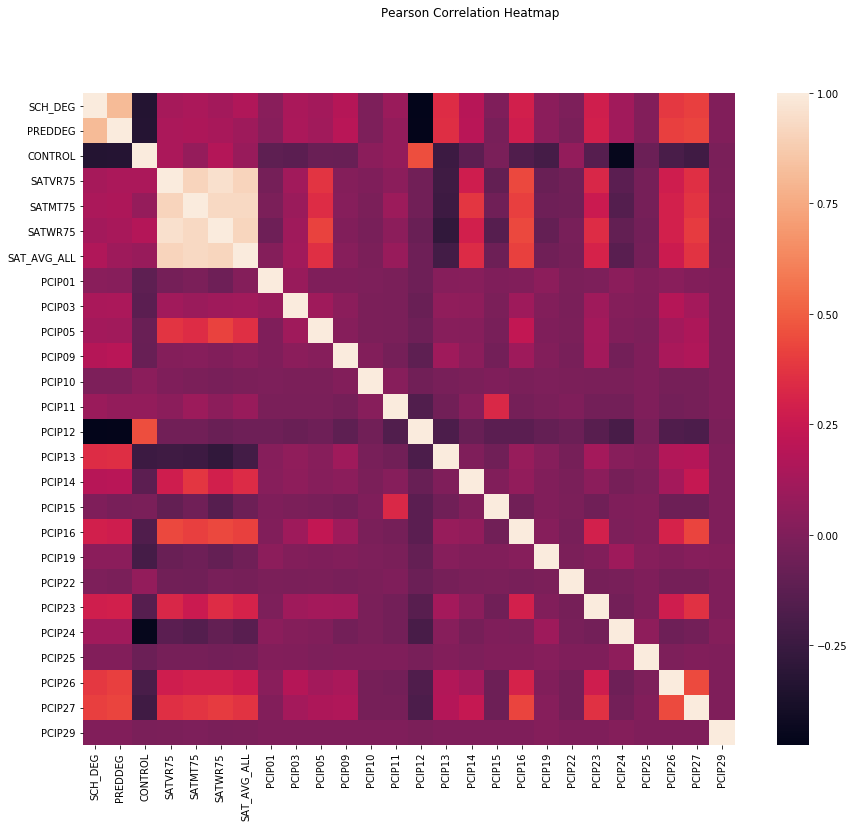

In [229]:
pd.set_option('precision',2)
plt.figure(figsize=(15,12))
sns.heatmap(merged_df[int_cols1].corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

#### Notes

int_cols2 = ['UG','UGDS','PPTUG_EF','NPT4_PUB','NPT4_PRIV','NPT4_PROG','COSTT4_A','COSTT4_P','PCTPELL','RET_FT4','RET_FTL4'
           ,'COUNT_WNE_INC1_P10','COUNT_WNE_INC2_P10','COUNT_WNE_INC3_P10','GRAD_DEBT_MDN_SUPP','CIP01BACHL','CIP03BACHL','CIP05BACHL',
            'CIP04BACHL','CIP09BACHL','CIP11BACHL','CIP12BACHL','CIP13BACHL']

The first colums looks at full-time and part students enrolled
The next 3 look at the Average net price for the diffrent types of institutions, public, private etc
The next 3 describe the Average cost of attendance for program-year institutions and academic year institutions, and number of graduates who receive a pell grant/
The next set are the retention rates
The next 3 describe Number of students working and not enrolled 10 years after entry in the lowest, middle and highest income percentile
The last group looks at the number of students in diffrent program degrees            


In [230]:
int_cols2 = ['UGDS','PPTUG_EF','NPT4_PUB','NPT4_PRIV','NPT4_PROG','COSTT4_A','COSTT4_P','PCTPELL','RET_FT4','RET_FTL4'
           ,'COUNT_WNE_INC1_P10','COUNT_WNE_INC2_P10','COUNT_WNE_INC3_P10','GRAD_DEBT_MDN_SUPP','CIP01BACHL','CIP03BACHL','CIP05BACHL',
            'CIP04BACHL','CIP09BACHL','CIP11BACHL','CIP12BACHL','CIP13BACHL']

In [231]:
#%%javascript
#IPython.OutputArea.prototype._should_scroll = function(lines) {
#    return false;
#}#

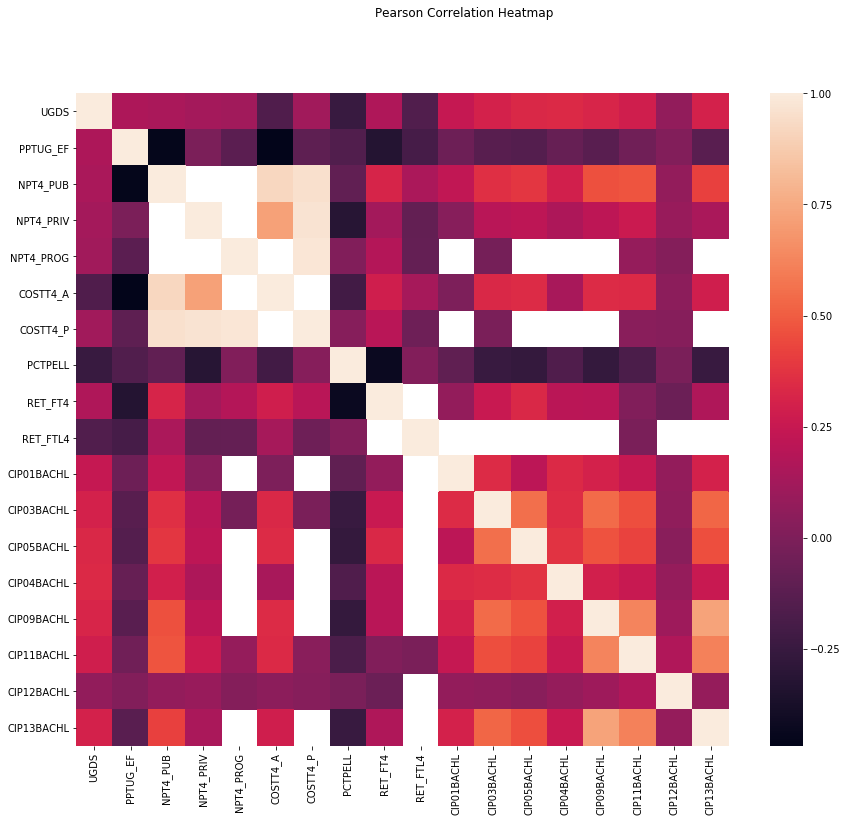

In [232]:
pd.set_option('precision',2)
plt.figure(figsize=(15,12))
sns.heatmap(merged_df[int_cols2].corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

#### Notes

There appears to be strong correlations between COSTT4_A(Average cost of attendance (academic year institutions)) and NPT4_PUB (average net price) which makes sense! 

In [233]:
#### Pairplot of Interesting features

I'll aslo pick another set of interesting features and visualise woth pairplot to see any dependies between them

cols_plot = ['COSTT4_A','PCTPELL','RET_FT4','SCH_DEG','SAT_AVG_ALL']

In [234]:
cols_plot = ['COSTT4_A','PCTPELL','RET_FT4','SCH_DEG','SAT_AVG_ALL']

<Figure size 864x720 with 0 Axes>

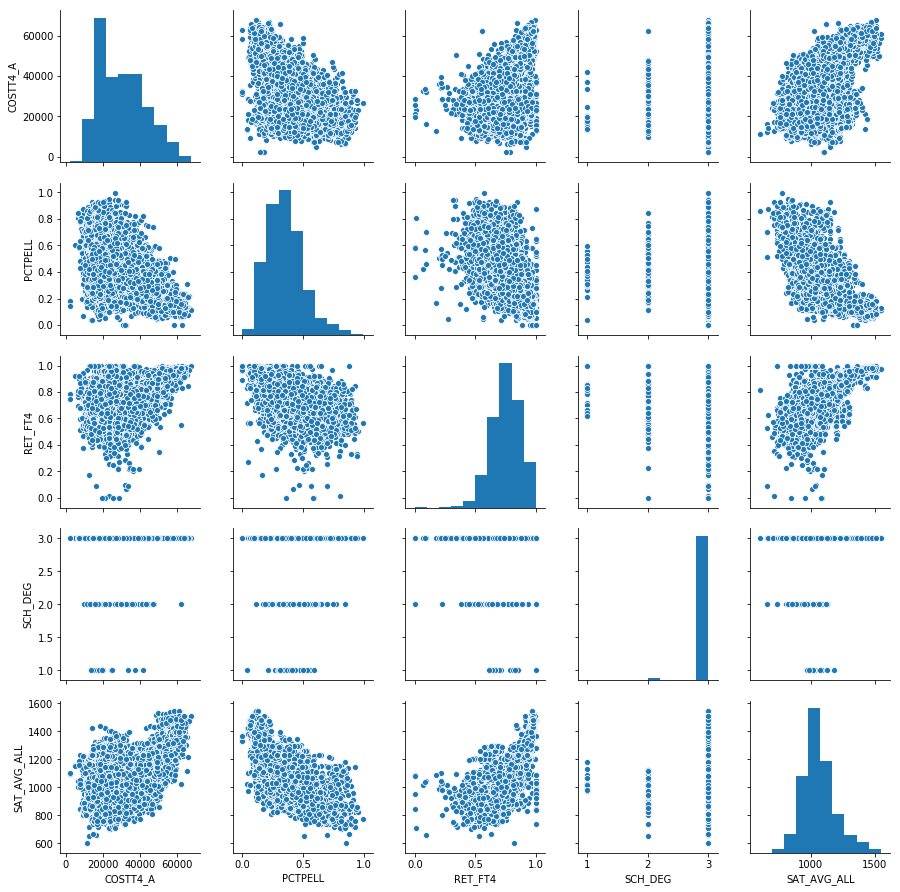

In [235]:
plt.figure(figsize=(12,10))
sns.pairplot(merged_df[cols_plot].dropna())
plt.show()



An interesting observation here is that the overall average sat score increase with the retention rate

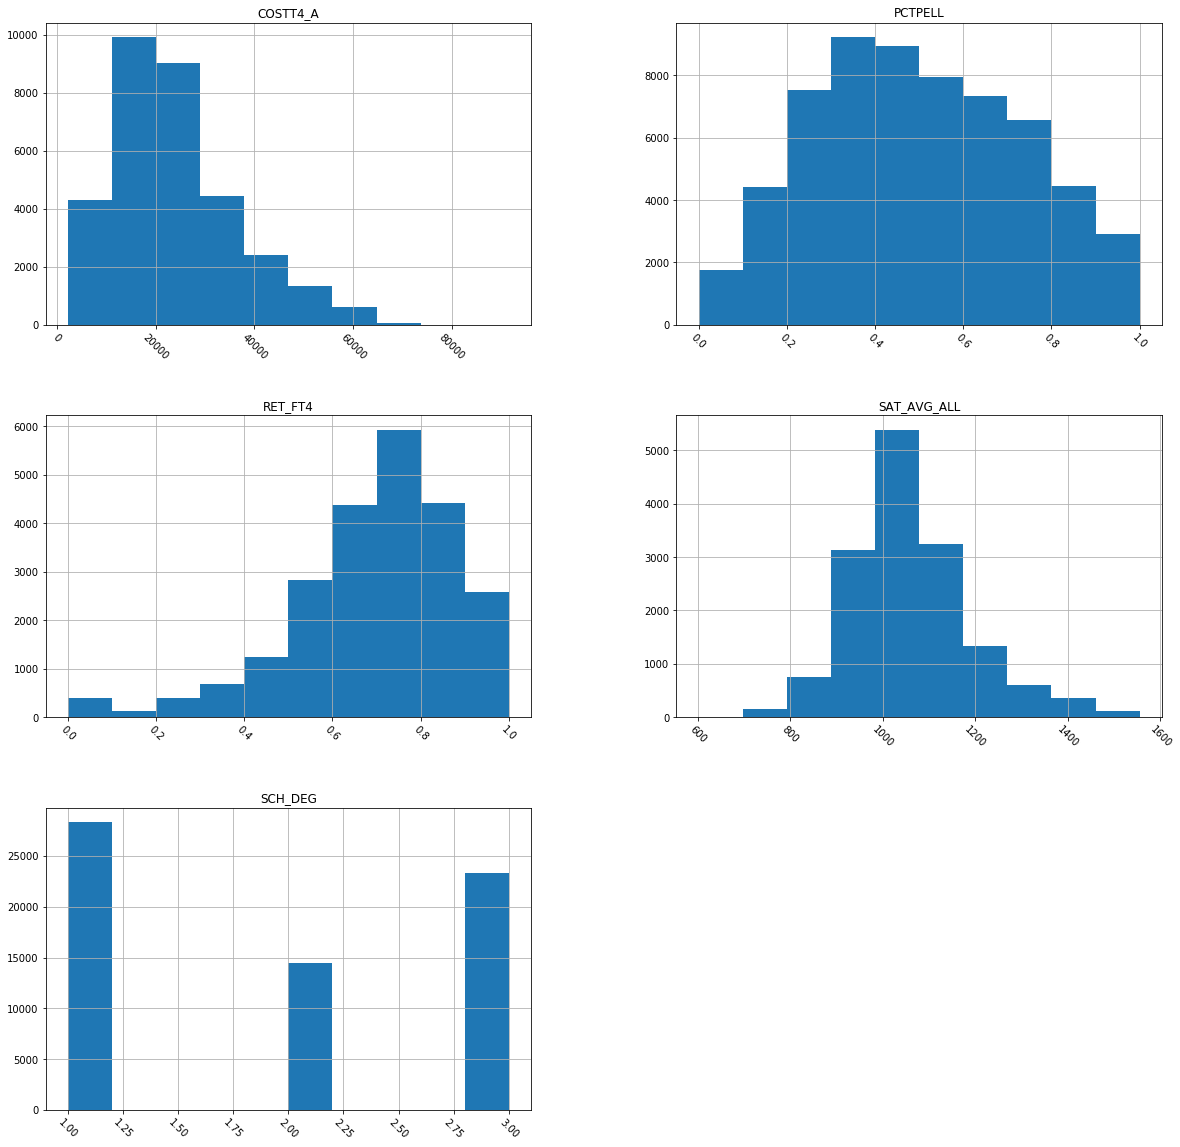

In [236]:
# Plot histogram grid
merged_df[cols_plot].hist(figsize=(20,20), xrot=-45)

# Clear the text "residue"
plt.show()

## Methodology

### Data Preprocessing

####  Step 1.1 Investigate Target Column

The data.yml file is a dictonary containing the names of the columns in the dataset, thier description and data types(for the numeric columns)



I will first review my target columns.

In [237]:
## Review the completion rate for 4 years institutions and less than 4 year institutions for full-time students

merged_df['C100_4'].count() + merged_df['C100_L4'].count()

52078

In [238]:
## Review the retention rate for  years institutions and less than 4 year institutionsfor part time students

merged_df['RET_PTL4'].count() + merged_df['RET_PT4'].count()

37031

In [239]:
## Review the retention rate for  years institutions and less than 4 year institutions for full time students

merged_df['RET_FTL4'].count() + merged_df['RET_FT4'].count() 

60581

As discussed in the introduction, the C100_4 and C100_L4, columns will be combined to form a final completion target column because the values are calculcated depending on the type of instution, therefore for each institution ( row of data) it's one of the other.



In [240]:
merged_df['COMPLETION_RATE'] = merged_df.C100_4.combine_first(merged_df.C100_L4)

merged_df['COMPLETION_RATE'].count()

52078

The target variable is skeweed to the right and is not normally distributed which can affect the Machine learning performace. We can use Log trasnformation to reduce the skeweness

#### Step 1.2 Count how many columns have all missing values

Firstly, I will check for columns that have all thier data missing. These columns or features will not contribute to the machine learning algorithm used to check what features could be used get university-level factors predict the presence of a strong retention and graduation rate.

In [241]:
# Check if any columns have all missing values.

merged_df.isna().all()


UNITID                        False
OPEID                         False
OPEID6                        False
INSTNM                        False
CITY                          False
STABBR                        False
ZIP                           False
ACCREDAGENCY                  False
INSTURL                       False
NPCURL                        False
SCH_DEG                       False
HCM2                          False
MAIN                          False
NUMBRANCH                     False
PREDDEG                       False
HIGHDEG                       False
CONTROL                       False
ST_FIPS                       False
REGION                        False
LOCALE                        False
LOCALE2                        True
LATITUDE                      False
LONGITUDE                     False
CCBASIC                       False
CCUGPROF                      False
CCSIZSET                      False
HBCU                          False
PBI                         

In [242]:
# Get a list of the columns with all missing values
all_missing_cols = merged_df.columns[merged_df.isna().all()].tolist()


print(len(all_missing_cols))

32


In [243]:
print (all_missing_cols)

['LOCALE2', 'UG', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH', 'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 'UG_HISPOLD', 'PPTUG_EF2', 'COUNT_ED', 'AGE_ENTRY_SQ', 'AGEGE24', 'LNFAMINC', 'LNFAMINC_IND', 'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN', 'PCT_HISPANIC', 'PCT_BA', 'PCT_GRAD_PROF', 'PCT_BORN_US', 'MEDIAN_HH_INC', 'POVERTY_RATE', 'UNEMP_RATE', 'LN_MEDIAN_HH_INC', 'FSEND_COUNT', 'FSEND_1', 'FSEND_2', 'FSEND_3', 'FSEND_4', 'FSEND_5']


Looking at the columnns with all missing data

* LOCALE2 - Degree of urbanization of institution
* UG - Enrollment of all undergraduate students
* UG_NRA,UG_UNKN,UG_WHITENH, UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD  - Total share of enrollment of undergraduate students who are non-resident aliens, unknown, white -non hispanic, black-non-hispanic, Asian/Pacific Islander,Indian/Alaska Native and Hispanic respectively
* PPTUG_EF2 - Share of undergraduate, degree-/certificate-seeking students who are part-time
* COUNT_ED' - Count of students in the earnings cohort aid.students_with_any_loan
* AGE_ENTRY_SQ - Average of the age of entry squared
* AGEGE24 - Percent of students over 23 at entry
* LNFAMINC, LNFAMINC_IND - Average of the log of family income and Average of the log of family income for independent students
* PCT_WHITE, 'PCT_BLACK', PCT_ASIAN',PCT_HISPANIC', PCT_BA',  - Percent of the population from students' zip codes that is White, black, asian, hispanic. 

* PCT_GRAD_PROF' - Percent of the population from students' zip codes over 25 with a professional degree
* PCT_BORN_US' - Percent of the population from students' zip codes that was born in the US, via 
* MEDIAN_HH_INC' - Median household income
* POVERTY_RATE' - Poverty rate
* UNEMP_RATE' - Unemployment rate
* LN_MEDIAN_HH_INC' - Log of the median household income
* FSEND_COUNT, 'FSEND_1', 'FSEND_2', 'FSEND_3', 'FSEND_4', 'FSEND_5 - - Average number of students who sent their FAFSA reports to at least one college, only 1, 2,3, 4 and 5 colleges respectively. 




I would have been interested in the race data and median household income data. The number of colleges applied to might have been interesting as well but they are completely unavailable with this dataset and I will be removing these columns in addition to others as they are all null values and will not contribute to the machine learning algorithm.



In [244]:
### Remove columns that have all missing data 
up_merged_df = merged_df.drop(all_missing_cols, axis=1)

In [245]:
## Check the shape of new dataframe
up_merged_df.shape

(74171, 1868)

#### Step 2. Review the remianing columns

Due to the tendency of having some columns collect data for only certain types of universities, it is important to join those columns before we review any additional missing data.



####  Step 2.1 Columns to be joined

To be joined (For academic + program)

COSTT4_A,COSTT4_P - Average Cost of Attendance, Tuition and Fees for Academic year institutions and program year institutions

NPT4_PRIV,NPT4_OTHER,NPT4_PUB,NPT4_OTHER - Average Net Price for public colleges,private colleges,program andother academic institutions.

RET_PTL4 and RET_PT4 - The retention rate for  years institutions and less than 4 year institutionsfor part time students

RET_FTL4 and RET_FT4 - The retention rate for  years institutions and less than 4 year institutionsfor full time students



In [246]:
## Average Cost of Attendance, Tuition and Fees for Academic joined

up_merged_df['COSTT4_A'].count() + up_merged_df['COSTT4_P'].count()

up_merged_df['COSTTAP'] = up_merged_df.COSTT4_A.combine_first(up_merged_df.COSTT4_P)

In [247]:
## Average Cost of Attendance, Tuition and Fees for Academic 

up_merged_df['COSTTAP'].count()

51758

In [248]:
## Add to list of columns to be dropped

dropped_cols = ['COSTT4_A','COSTT4_P']

In [249]:
### Average net price for public colleges, private colleges, program and other.

up_merged_df['NPT4_PRIV'].count() + up_merged_df['NPT4_PUB'].count() + up_merged_df['NPT4_PROG'].count() + up_merged_df['NPT4_OTHER'].count()


51745

In [250]:
## Join the columns for public colleges, private colleges, program and other.
up_merged_df['NPT4_PPOP'] = up_merged_df.NPT4_PRIV.combine_first(up_merged_df.NPT4_PUB)

up_merged_df['NPT4_PPOP'] = up_merged_df.NPT4_PPOP.combine_first(up_merged_df.NPT4_OTHER)

up_merged_df['NPT4_PPOP'] = up_merged_df.NPT4_PPOP.combine_first(up_merged_df.NPT4_PROG)

In [251]:
up_merged_df['NPT4_PPOP'].count()

51745

In [252]:
### Add to the lsit of columns to be dropped.

dropped_cols.extend(['NPT4_PRIV','NPT4_OTHER','NPT4_PUB','NPT4_OTHER'])

In [253]:
print (dropped_cols)

['COSTT4_A', 'COSTT4_P', 'NPT4_PRIV', 'NPT4_OTHER', 'NPT4_PUB', 'NPT4_OTHER']


In [254]:
##The retention rate for  years institutions and less than 4 year institutionsfor part time students


up_merged_df['RET_PTL4'].count() + up_merged_df['RET_PT4'].count()


## Join The retention rate for  years institutions and less than 4 year institutionsfor part time students

up_merged_df['RETPT'] = up_merged_df.RET_PTL4.combine_first(up_merged_df.RET_PT4)

In [255]:
up_merged_df['RETPT'].count()

37031

In [256]:
### Add to the lsit of columns to be dropped.


dropped_cols.extend(['RET_PTL4','RET_PT4'])

In [257]:
##The retention rate for  years institutions and less than 4 year institutionsfor full time students


up_merged_df['RET_FTL4'].count() + up_merged_df['RET_FT4'].count()


## Join The retention rate for  years institutions and less than 4 year institutionsfor full time students

up_merged_df['RETFT'] = up_merged_df.RET_FTL4.combine_first(up_merged_df.RET_FT4)

In [258]:
up_merged_df['RETFT'].count()

60581

In [259]:
### Add to column list to be droppped
dropped_cols.extend(['RET_FTL4','RET_FT4'])

In [260]:
# Drop the features that  have been joined.

up_merged_df = up_merged_df.drop(dropped_cols, axis=1)

#### Step 2.2 Check the missing values for the remaing columns

In [261]:
### Some columns have a value with "Privacy suppressed" that will be replaced with Nans

up_merged_df = up_merged_df.replace('PrivacySuppressed', np.nan)

In [262]:
## Find and count the missing values for the remaning columns -

nat_missing = up_merged_df.isnull().sum()
nat_missing.columns = ['feature_name', 'missing_count']
nat_missing.sort_values()

UNITID                              0
OPEID                               0
OPEID6                              0
INSTNM                              0
CITY                                0
STABBR                              0
ZIP                                 0
HIGHDEG                             0
PREDDEG                             0
NUMBRANCH                           0
MAIN                                0
REGION                              1
ST_FIPS                             1
CONTROL                            23
ICLEVEL                            23
FAMINC                           2822
DEP_STAT_N                       2822
APPL_SCH_N                       2822
AGE_ENTRY                        2822
MD_FAMINC                        2822
INC_N                            2822
CIP29BACHL                       3399
CIP27CERT4                       3399
CIP29ASSOC                       3399
CIP30CERT1                       3399
CIP30CERT2                       3399
CIP30ASSOC  

In [263]:
# Perform an assessment of how much missing data there is in each column of the
# dataset. 
new_missing = up_merged_df.isnull().sum()
type(new_missing)


pandas.core.series.Series

In [264]:
# Investigate patterns in the amount of missing data in each column.

df_missing = pd.DataFrame(new_missing).reset_index()
df_missing.columns = ['feature_name', 'missing_count']

## Add a dataframe of check percentages of missing data

list(df_missing)
df_missing['perc'] = df_missing['missing_count']/up_merged_df.shape[0]

In [265]:
### review the different percentages of missing data.

perc = [0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
rows_list = []
for i in range(len(perc)):
    df_missing_col_outlier = df_missing[(df_missing.perc > perc[i])]
    count_missing = df_missing_col_outlier.shape[0]
    row_dict = {}
    row_dict = {perc[i]: count_missing}
    rows_list.append(row_dict)

In [266]:
rows_list

[{0.2: 1556},
 {0.3: 1504},
 {0.4: 1424},
 {0.5: 1294},
 {0.6: 1141},
 {0.7: 957},
 {0.8: 723},
 {0.9: 471}]

In [267]:
### Check the columns that have more than 20% of missing data

df_missing_outlier = df_missing[(df_missing.perc > 0.31)]
df_missing_outlier.sort_values('perc')


,feature_name,missing_count,perc
1471,LO_INC_YR8_N,23343,0.31
1449,MALE_YR4_N,23447,0.32
1448,FEMALE_YR4_N,23447,0.32
426,WDRAW_ORIG_YR2_RT,23869,0.32
1411,APPL_SCH_PCT_GE5,23902,0.32
1528,RPY_1YR_N,24064,0.32
1406,PAR_ED_PCT_HS,24117,0.33
1405,PAR_ED_PCT_MS,24224,0.33
1542,RPY_3YR_N,24490,0.33
1423,NOPELL_YR2_N,24549,0.33


#### Notes

There are groups of features here that have more than 20% of their data msssing

* SATVR/SATMT/SATWR/SATMTID/SATWRMID/SATVAVG/SATAVG - These are all SAT scores in writing, critical reasoning, maths and mid-points for the institutions. I would expect this to be a good feature but more than 70% of these values are missing. This is because scores are only available for certain years.

* ACTVR/ACTMT/ACTWR/ACTMTID/ACTWRMID/ACTVAVG/ACTAVG - These are all ACT scores in English, Math and writing and I would expect this to be a good feature but more than 70% of these values are missing. This is because scores are only available for certain years.

* UGDS_WHITENH/UGDS_BLACKNH/UGDS_API/UGDS_AIANOLD/UGDS_HISPOLD - Total share of enrollment of undergraduate degree-seeking students who are white -non hispanic, black-non-hispanic, Asian/Pacific Islander,Indian/Alaska Native and Hispanic respectively.

* NPT4_PUB,PROG,PRIV - Average net price for the largest program for public and private institutions

* NPT4*_ PUB,PROG,PRIV - Average net price of family income in various income brackets

* DEBT and INC* - The Debt and income features.

I would have liked to see these features as well because I would want to believe that family finances and cost of the program would be large influencing factors. However, the data is also missing for 70% of the data.

* NUM4_ PUB,PROG,PRIV   - Number of Title IV students for public, private and program year institutions
* NUM4*_ PUB,PROG,PRIV  - Number of Title IV students in various income brackets

In [268]:
# add the features with more than 20% to a new list of features to be dropped.

drop_features = df_missing_outlier['feature_name']
list_drop_features = list(drop_features)



In [269]:
## Drop the features 
up_merged_df = up_merged_df.drop(list_drop_features, axis=1)

In [270]:
## Review the updated features
up_merged_df.shape

(74171, 368)

In [271]:
up_merged_df['COMPLETION_RATE'].head()

0    0.13
1    0.14
2    0.00
3    0.14
4    0.12
Name: COMPLETION_RATE, dtype: float64

In [272]:
up_merged_df['COSTTAP'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: COSTTAP, dtype: float64

#### Step 2.3  Assess the different feature types for the remaining columns

* For any categorgical data, we can encolde as dummy variables.

* For numerical or float data, we might need to apply  scaling.

As seen previously, a large number of object data were float or int, and I'm going to convert these columns back to float or int.




In [273]:
## Get the list of columns that are float
float_list = list(up_merged_df.columns[(up_merged_df.dtypes.values == np.dtype('float64'))])

In [274]:
print (len(float_list))

257


In [275]:
## Get the list of columns that are integer and will need to be scaled
int_list =  list(up_merged_df.columns[(up_merged_df.dtypes.values == np.dtype('int64'))])

In [276]:
print (len(int_list))

6


In [277]:
## Categorical values that need to be encoded 
categorical_list = up_merged_df.columns[(up_merged_df.dtypes.values == np.dtype('object'))]
categorical_list = list(categorical_list)

In [278]:
print (len((categorical_list)))

105


In [279]:
print (categorical_list)

['OPEID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'COMP_ORIG_YR2_RT', 'COMP_ORIG_YR3_RT', 'COMP_ORIG_YR4_RT', 'COMP_ORIG_YR6_RT', 'INC_PCT_LO', 'DEP_STAT_PCT_IND', 'DEP_INC_PCT_LO', 'IND_INC_PCT_LO', 'PAR_ED_PCT_1STGEN', 'INC_PCT_M1', 'INC_PCT_M2', 'PAR_ED_PCT_PS', 'APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'DEP_INC_AVG', 'IND_INC_AVG', 'OVERALL_YR2_N', 'LO_INC_YR2_N', 'DEP_YR2_N', 'IND_YR2_N', 'FEMALE_YR2_N', 'MALE_YR2_N', 'FIRSTGEN_YR2_N', 'NOT1STGEN_YR2_N', 'OVERALL_YR3_N', 'LO_INC_YR3_N', 'DEP_YR3_N', 'IND_YR3_N', 'FEMALE_YR3_N', 'MALE_YR3_N', 'FIRSTGEN_YR3_N', 'NOT1STGEN_YR3_N', 'OVERALL_YR4_N', 'LO_INC_YR4_N', 'DEP_YR4_N', 'IND_YR4_N', 'FIRSTGEN_YR4_N', 'NOT1STGEN_YR4_N', 'OVERALL_YR6_N', 'LO_INC_YR6_N', 'DEP_YR6_N', 'IND_YR6_N', 'FIRSTGEN_YR6_N', 'NOT1STGEN_YR6_N', 'OVERALL_YR8_N', 'DEP_YR8_N', 'IND_YR8_N', 'FIRSTGEN_YR8_N', 'NOT1STGEN_YR8_N', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'FEMALE_DEB

In [280]:
## A number of the categorical features here aren't categorical at all but are instead float in brackets.
## Check for any of the objects features with 'RT' which in the data dictonary represents rate and should be float

check_float_cols = [col for col in categorical_list if 'RT' in col]

for feature in check_float_cols:
    if feature in categorical_list:
        categorical_list.remove(feature)

In [281]:
print (check_float_cols)

['COMP_ORIG_YR2_RT', 'COMP_ORIG_YR3_RT', 'COMP_ORIG_YR4_RT', 'COMP_ORIG_YR6_RT']


In [282]:
## A number of the categorical features here aren't categorical at all but are instead float in brackets.
## Check for any of the objects features with 'PCT' which in the data dictonary represents rate and should be float

check_pct_cols = [col for col in categorical_list if 'PCT' in col]
#print(list(df.columns))
print (check_pct_cols)

['INC_PCT_LO', 'DEP_STAT_PCT_IND', 'DEP_INC_PCT_LO', 'IND_INC_PCT_LO', 'PAR_ED_PCT_1STGEN', 'INC_PCT_M1', 'INC_PCT_M2', 'PAR_ED_PCT_PS', 'APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3']


In [283]:
## Add the PCT cols to the float columns list
check_float_cols.extend(check_pct_cols)

In [284]:
### Looking at the data dictionary, the following columns in the category list are also float.

other_floats = ['FEMALE','MARRIED','DEPENDENT','FIRST_GEN','PELL_EVER']

In [285]:
## Add the other cols to the float columns list
check_float_cols.extend(other_floats)

In [286]:
### check for any date columns
check_date_cols = [col for col in categorical_list if 'DT' in col]

for feature in check_date_cols:
    if feature in categorical_list:
        categorical_list.remove(feature)

In [287]:
## Reviewing the remainig category columns in the data dictionary, these are the only object columns remaing.

categories = ['OPEID','INSTNM','CITY','STABBR','ZIP']

In [288]:
### remove all the float columns from the initial category list - leaving only int and categorical columns

for feature in check_float_cols:
    if feature in categorical_list:
        categorical_list.remove(feature)

In [289]:
### Remove all the category columns  from the categorical list - causing it to be left with essentially int columns

for feature in categories:
    if feature in categorical_list:
        categorical_list.remove(feature)

In [290]:
### Change the category list to a num list
check_num_cols = categorical_list

In [291]:
print (len(check_float_cols))

19


In [292]:
print (len(check_num_cols))

79


In [293]:
print (check_num_cols)

['DEP_INC_AVG', 'IND_INC_AVG', 'OVERALL_YR2_N', 'LO_INC_YR2_N', 'DEP_YR2_N', 'IND_YR2_N', 'FEMALE_YR2_N', 'MALE_YR2_N', 'FIRSTGEN_YR2_N', 'NOT1STGEN_YR2_N', 'OVERALL_YR3_N', 'LO_INC_YR3_N', 'DEP_YR3_N', 'IND_YR3_N', 'FEMALE_YR3_N', 'MALE_YR3_N', 'FIRSTGEN_YR3_N', 'NOT1STGEN_YR3_N', 'OVERALL_YR4_N', 'LO_INC_YR4_N', 'DEP_YR4_N', 'IND_YR4_N', 'FIRSTGEN_YR4_N', 'NOT1STGEN_YR4_N', 'OVERALL_YR6_N', 'LO_INC_YR6_N', 'DEP_YR6_N', 'IND_YR6_N', 'FIRSTGEN_YR6_N', 'NOT1STGEN_YR6_N', 'OVERALL_YR8_N', 'DEP_YR8_N', 'IND_YR8_N', 'FIRSTGEN_YR8_N', 'NOT1STGEN_YR8_N', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN', 'DEBT_N', 'GRAD_DEBT_N', 'WDRAW_DEBT_N', 'LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N', 'DEP_DEBT_N', 'IND_DEBT_N', 'PELL_DEBT_N', 'NOPELL_DEBT_N', 'FEMALE_DEBT_N', 'MALE_DEBT_N', 'FIRSTGEN_DEBT_N', 'NOTFIRSTGEN_DEBT_N', 'CUML

In [294]:
print (len(categories))

5


#### Notes

I have now seperated the category list into float, int and actual object columns. I will continue to investigate the data set and start feature selection before I treat perform any transformations on the rest of the data set.

#### Step 3 : Complete Feature Selection

I want to make sure that my data frame now only has features I want to keep.


In [295]:
#from IPython.core.interactiveshell import InteractiveShell

#InteractiveShell.ast_node_interactivity = "all"

In [296]:
#pd.options.display.max_rows = 100

###  Step 3.1 Get  any features that don't provide any relevant information 




INSTNM  -  Institution name
ALIAS   -  Institution name aliases
CITY    -  City 
STABBR  -  State postcode
OPEID/6   - 8-digit and 6-digit OPE ID for institution
ZIP     - ZIP code
UNITID  - Unit ID for institution
REGION  - Region of Schools
ST_FIPS - IPS code for state

In [297]:
### Review category columns

In [298]:
print (categories)

['OPEID', 'INSTNM', 'CITY', 'STABBR', 'ZIP']


In [299]:
updated_dropped = list()
print (updated_dropped)

[]


In [300]:
## The categories list will be dropped as they don't contain information that is useful for ML

updated_dropped = categories

In [301]:
updated_dropped.append('REGION')
updated_dropped.append('ST_FIPS')

In [302]:
### Drop date columns
updated_dropped.extend(check_date_cols)

In [303]:
#### Review Integer columns

In [304]:
print (int_list)

['UNITID', 'OPEID6', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG']


#### Integer columns that are ranked 

PREDDEG - Predominant undergraduate degree awarded
HIGHDEG - Highest degree awarded
CONTROL - Control of institution
ICLEVEL - Level of institution

In [305]:
### Add to list of features that can be dropped
updated_dropped.extend(['UNITID','OPEID6'])

In [306]:
## Add MAIN and NUMBBRANCH to check_num_cols to be scaled.


#check_num_cols.extend(['MAIN','NUMBRANCH'])

In [307]:
### remove them from the nor

#int_list.remove('MAIN')
#int_list.remove('NUMBRANCH')

In [308]:
print (updated_dropped)


['OPEID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'REGION', 'ST_FIPS', 'SEPAR_DT_MDN', 'SEPAR_DT_N', 'UNITID', 'OPEID6']


In [309]:
### drop the unwanted columns
up_merged_df =up_merged_df.drop(updated_dropped, axis=1)

#### Step 4:  Assess missing rows & change string float/number features to float/int

sklearn requires that data not have missing values in order for its estimators to work properly. I have to clean all my data of any remaining missing values. 

##### Step 4.1 Assess missing rows

1. Drop missing rows with Nan's based on the completion rate
2. Asses and drop any other missing rows.

In [310]:
### Drop rows if completion_rate is null
    
comp_up_merged = up_merged_df.dropna(subset=['COMPLETION_RATE'])

In [311]:

comp_up_merged.shape

(52078, 357)

Skewness: 0.553656
Kurtosis: -0.775188


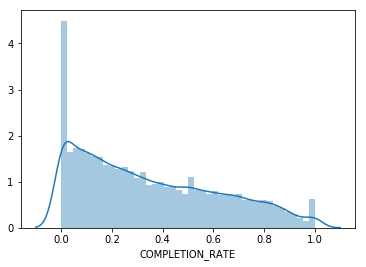

In [312]:
sns.distplot(comp_up_merged['COMPLETION_RATE']);
#skewness and kurtosis
print("Skewness: %f" % comp_up_merged['COMPLETION_RATE'].skew())
print("Kurtosis: %f" % comp_up_merged['COMPLETION_RATE'].kurt())

The distribution of completion rate is slightly  skewed to the right. I will apply a log transform to check if this reduces the skewness as ML models assume normal distribution

/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Skewness: 0.294733
Kurtosis: -1.070758


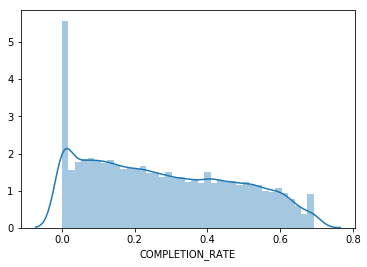

In [313]:
comp_up_merged['COMPLETION_RATE'] = np.log1p(comp_up_merged['COMPLETION_RATE'])

# skewness and kurtosis
sns.distplot(comp_up_merged['COMPLETION_RATE']);
#skewness and kurtosis
print("Skewness: %f" % comp_up_merged['COMPLETION_RATE'].skew())
print("Kurtosis: %f" % comp_up_merged['COMPLETION_RATE'].kurt())

The skewennes is slightly reduced.

In [314]:
### Continue to investigate missing row values.

row_missing = comp_up_merged.isnull().sum(axis=1)


In [315]:
## Change to results to a dataframe 

df_missing_rows = pd.DataFrame(row_missing).reset_index()
df_missing_rows.columns = ['row_number', 'missing_count']

## Add a dataframe of check percentages of missing data
list(df_missing_rows)
df_missing_rows['perc'] = df_missing_rows['missing_count']/comp_up_merged.shape[1]

In [316]:
df_missing_rows.sort_values('perc',ascending=False)

,row_number,missing_count,perc
8821,19202,266,0.75
7298,17484,254,0.71
3871,11587,129,0.36
8233,18524,125,0.35
1206,3108,113,0.32
693,1910,112,0.31
995,2659,111,0.31
1857,4832,111,0.31
1104,2864,110,0.31
1013,2703,110,0.31


In [317]:
## create a list of threshold and counts to know what threshold is suitable for dropping rows the data set

perc = [0.10 ,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
rows_list = []
for i in range(len(perc)):
    df_missing_rows_outlier = df_missing_rows[(df_missing_rows.perc > perc[i])]
    count_missing = df_missing_rows_outlier.shape[0]
    row_dict = {}
    row_dict = {perc[i]: count_missing}
    rows_list.append(row_dict)

In [318]:
print (rows_list)

[{0.1: 13163}, {0.2: 2748}, {0.3: 15}, {0.4: 2}, {0.5: 2}, {0.6: 2}, {0.7: 2}, {0.8: 0}, {0.9: 0}]


#### Notes

I will drop all rows with missing values.

In [319]:
## Dataset no missing Nans

clean_merged_df = comp_up_merged.dropna()
clean_merged_df.shape

(21838, 357)

#### Step 4.2 change string float/number features to float/int

As notice previously, some of the float and integer data are actually reprenseted as string. I will now change the those values to string and float.


In [320]:
## Change the float columns designed as object to float

for col in check_float_cols:
    clean_merged_df[col] = clean_merged_df[col].astype(float)

/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [321]:
### Change the int columns designed as object to float and first and then convert back to int becuase there are columns
### designated as int which have float values such as price

for col in check_num_cols:
    clean_merged_df[col] = clean_merged_df[col].astype(float)

/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [322]:
## finally convert to int

for col in check_num_cols:
    clean_merged_df[col] = clean_merged_df[col].astype(int)

/Users/tobikasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Check that we have only numeric columns left.

In [323]:
## check float columns
float_list = list(clean_merged_df.columns[(clean_merged_df.dtypes.values == np.dtype('float64'))])
print(len(float_list))

274


In [324]:
### Check int columns

int_list = list(clean_merged_df.columns[(clean_merged_df.dtypes.values == np.dtype('int64'))])
print(len(int_list))

83


In [325]:
### Check object columns

cat_list = list(clean_merged_df.columns[(clean_merged_df.dtypes.values == np.dtype('object'))])
print(len(cat_list))

0


In [326]:
clean_merged_df.shape

(21838, 357)

### Implementation

With the high number of features, I would like to apply PCA to reduce the dimension based on explained variance of features. 

 #### Step 5.1  Scale data and perform Dimensionality Reduction



In [327]:
from sklearn.preprocessing import StandardScaler

In [328]:
#### Scale data to  investigate PCA

#scaler = StandardScaler().fit(clean_merged_df) 
#scaled_clean_merged_df = scaler.transform(comp_up_merged)



Due to the large number of columns that int and misidentified as string/object, I had some challenges trying to scale the data, fitting with dataset without missing values and trying to transform on the clean (no missing dataset).

In [329]:
# Apply PCA to the data.


def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    pca = PCA(n_components,random_state=10)
    data_pca = pca.fit_transform(data)
    return pca, data_pca


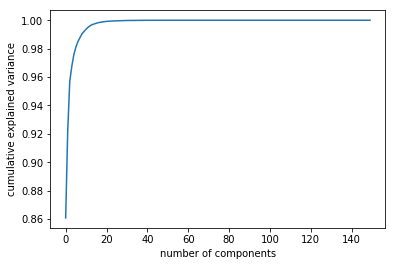

In [330]:
## Check the variance explaned by 150 Pirncipal components

pca = PCA(150).fit(clean_merged_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [331]:
# Investigate the variance accounted for by each principal component. - This function is from a previous course.

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(24, 16))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    



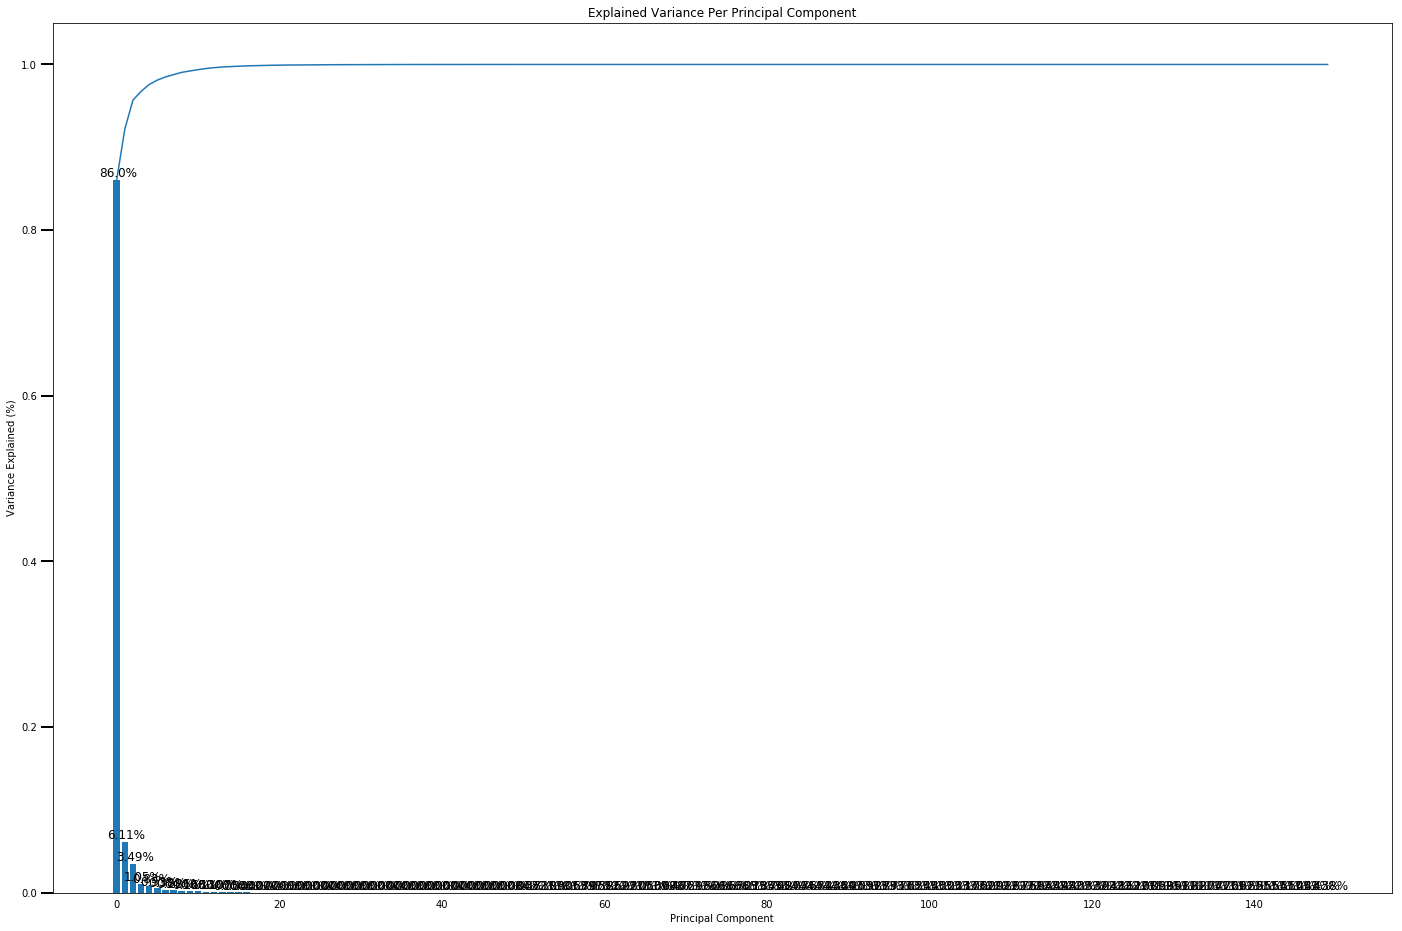

In [332]:
## Draw the variaance fpr 150 principal components
scree_plot(pca)

In [333]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca, pca_clean_merged_df = do_pca(150,clean_merged_df )

# Notes

The first component explains 86.1 percent and I;. and the second 7.92.4 percent of the total variability of the data. The total amount of variablity explanined by the 150 components is about 100% and I think this should be good enough. 

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components.

In [334]:
#### Closer look at the pca components
pca.components_

array([[ 7.71310128e-07, -8.28979791e-07,  6.71181271e-05, ...,
         2.31969906e-03,  6.05230637e-03, -2.22463885e-07],
       [ 1.48425527e-05,  2.92319516e-06, -5.01670540e-05, ...,
         1.59321287e-01,  7.14302982e-02,  1.66296621e-06],
       [-8.23161169e-07,  3.28423701e-07,  1.35114474e-05, ...,
         1.52823943e-03,  7.12530273e-03,  2.16768791e-08],
       ...,
       [-3.86445556e-03, -6.87889090e-03,  2.23919173e-03, ...,
         2.08395416e-07, -1.34746433e-07,  4.16881726e-02],
       [ 1.60626966e-02,  9.55867734e-03,  4.25723876e-04, ...,
        -5.14907824e-06,  5.15401743e-06,  1.65898586e-02],
       [ 2.17554763e-01,  2.09989827e-02,  3.54132090e-04, ...,
         1.08173986e-06, -1.74650283e-06,  2.02888300e-02]])

In [335]:
### look at new pca shape
pca_clean_merged_df.shape

(21838, 150)

In [336]:
## Get the feature names to be used with the PCA components
columns=list(clean_merged_df)

In [337]:
### What does the pca_Component about look like?
pca.components_[0]

array([ 7.71310128e-07, -8.28979791e-07,  6.71181271e-05,  7.50653075e-07,
        1.11036191e-06,  1.05512213e-06, -5.42689454e-09, -3.48222289e-09,
       -1.89657190e-09, -1.04374799e-09, -1.92811709e-08, -3.50717938e-09,
        6.77257041e-08, -7.72456661e-08, -3.25802330e-08, -1.00686080e-08,
        2.57467684e-09, -3.67893912e-09, -6.11788232e-09, -5.25135856e-09,
       -1.11277790e-08, -7.86284805e-08, -7.74916783e-11, -2.15514006e-08,
       -4.55044110e-09, -2.01930172e-10,  1.04380504e-08, -1.28453210e-08,
       -3.24723229e-09, -1.19079566e-08, -5.86687496e-09, -8.49949596e-10,
       -2.10163060e-08,  3.87194978e-08,  2.03265759e-08, -2.36206904e-08,
       -9.94804853e-09, -2.95258700e-08, -8.78039657e-09, -5.87004760e-09,
       -2.80099069e-08, -1.83559934e-07,  4.94127194e-07, -7.80929030e-09,
       -5.53164279e-08, -6.17733950e-08, -1.08344851e-07, -5.34117003e-09,
       -5.01065231e-08, -2.09506790e-08, -2.01464045e-08, -5.83595068e-08,
       -7.93401278e-10, -

In [338]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

## Create a dataframe so we can look at the PCA data with the feature names.
pca_df = pd.DataFrame(pca.components_, columns=list(clean_merged_df))

In [339]:
pca_df.shape

(150, 357)

In [340]:
pca_df.head()

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,PCIP01,PCIP03,PCIP04,PCIP05,...,GRAD_DEBT_MDN_SUPP,ICLEVEL,UGDS_MEN,UGDS_WOMEN,D_PCTPELL_PCTFLOAN,OPENADMP,COMPLETION_RATE,COSTTAP,NPT4_PPOP,RETFT
0,7.71e-07,-8.29e-07,6.71e-05,7.51e-07,1.11e-06,1.06e-06,-5.43e-09,-3.48e-09,-1.90e-09,-1.04e-09,...,0.01,-6.21e-07,4.06e-08,-4.06e-08,3.35e-03,-3.61e-07,-2.17e-07,2.32e-03,6.05e-03,-2.22e-07
1,1.48e-05,2.92e-06,-5.02e-05,1.49e-05,2.04e-05,-4.42e-06,4.81e-08,6.71e-08,5.07e-08,3.09e-08,...,0.12,-1.16e-05,1.20e-06,-1.20e-06,2.32e-02,8.39e-06,1.47e-06,1.59e-01,7.14e-02,1.66e-06
2,-8.23e-07,3.28e-07,1.35e-05,-9.15e-07,-1.25e-06,-1.17e-06,8.64e-09,1.90e-09,4.97e-10,1.48e-09,...,-0.03,6.38e-07,7.21e-08,-7.21e-08,1.24e-02,4.61e-07,1.44e-07,1.53e-03,7.13e-03,2.17e-08
3,6.59e-07,7.76e-06,-1.75e-04,4.07e-07,-2.76e-06,-3.50e-05,2.76e-07,7.56e-08,-1.09e-08,2.69e-08,...,-0.24,2.34e-06,1.71e-06,-1.71e-06,2.48e-01,-3.45e-06,-1.97e-06,-3.69e-01,-3.06e-01,8.05e-07
4,4.84e-06,-1.59e-06,-2.16e-05,4.52e-06,6.56e-06,-6.34e-07,-2.89e-09,-4.03e-09,5.60e-09,1.69e-09,...,0.06,-4.33e-06,6.54e-07,-6.54e-07,7.40e-02,1.25e-06,-6.90e-07,-1.93e-02,-7.05e-03,-6.18e-07


In [341]:
### Change the shape of the dataframe to enable easier sorting.

pca_df_transposed = pca_df.transpose()

In [342]:
pca_df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
SCH_DEG,7.71e-07,1.48e-05,-8.23e-07,6.59e-07,4.84e-06,2.43e-05,-2.04e-05,3.75e-06,-1.11e-06,8.95e-07,...,-1.03e-01,4.52e-02,9.45e-02,-3.36e-01,9.46e-03,-3.66e-02,-9.24e-04,-3.86e-03,1.61e-02,2.18e-01
MAIN,-8.29e-07,2.92e-06,3.28e-07,7.76e-06,-1.59e-06,3.92e-06,-6.23e-06,6.77e-06,2.69e-06,1.95e-05,...,-4.40e-02,-1.23e-03,4.08e-02,-5.53e-02,1.15e-03,-1.06e-02,5.37e-03,-6.88e-03,9.56e-03,2.10e-02
NUMBRANCH,6.71e-05,-5.02e-05,1.35e-05,-1.75e-04,-2.16e-05,-4.48e-05,2.28e-04,-1.29e-04,-3.48e-04,-8.84e-04,...,2.46e-03,-1.86e-03,5.88e-04,-4.00e-04,-1.66e-03,1.05e-03,1.35e-03,2.24e-03,4.26e-04,3.54e-04
PREDDEG,7.51e-07,1.49e-05,-9.15e-07,4.07e-07,4.52e-06,2.36e-05,-1.98e-05,4.91e-06,-7.35e-07,4.06e-06,...,5.58e-02,-5.67e-02,-1.16e-01,3.39e-01,-2.31e-03,2.23e-02,4.40e-02,-3.80e-02,-2.77e-02,-2.77e-01
HIGHDEG,1.11e-06,2.04e-05,-1.25e-06,-2.76e-06,6.56e-06,3.10e-05,-2.20e-05,1.14e-05,2.51e-07,8.31e-06,...,-3.43e-02,5.61e-02,-2.25e-02,-2.94e-02,7.81e-02,1.39e-02,-1.30e-01,-1.27e-02,2.47e-02,7.88e-03


In [343]:
pca_df_sort = pca_df_transposed[0].sort_values(ascending=False)

In [344]:
# Sort and get the top 5
pca_df_sort.head()

DEBT_N         0.29
CUML_DEBT_N    0.29
IND_DEBT_N     0.27
DEP_STAT_N     0.24
APPL_SCH_N     0.24
Name: 0, dtype: float64

In [345]:
# Sort and get the buttom 5

pca_df_sort.tail()

PELL_DEBT_MDN   -3.90e-03
INEXPFTE        -4.11e-03
MD_FAMINC       -1.42e-02
FAMINC          -1.72e-02
DEP_INC_AVG     -1.74e-02
Name: 0, dtype: float64

In [346]:
## Write a function to get the top 5 positive and inverse correlations

def imp_features(prin_comp):
    pca_df_sort = pca_df_transposed[prin_comp].sort_values(ascending=False)
    print("The Top 5 positive correlations \n", pca_df_sort.head())
    print("The Top 5 inverse correlations \n" , pca_df_sort.tail())      
    

In [347]:
# Get the first principal component.

imp_features(0)

The Top 5 positive correlations 
 DEBT_N         0.29
CUML_DEBT_N    0.29
IND_DEBT_N     0.27
DEP_STAT_N     0.24
APPL_SCH_N     0.24
Name: 0, dtype: float64
The Top 5 inverse correlations 
 PELL_DEBT_MDN   -3.90e-03
INEXPFTE        -4.11e-03
MD_FAMINC       -1.42e-02
FAMINC          -1.72e-02
DEP_INC_AVG     -1.74e-02
Name: 0, dtype: float64


In [348]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.


# Get the second principal component.
imp_features(1)


The Top 5 positive correlations 
 FAMINC           0.53
DEP_INC_AVG      0.53
MD_FAMINC        0.45
COSTTAP          0.16
CUML_DEBT_P90    0.15
Name: 1, dtype: float64
The Top 5 inverse correlations 
 LO_INC_DEBT_N   -5.94e-03
LO_INC_YR4_N    -6.36e-03
LO_INC_YR3_N    -6.63e-03
LO_INC_YR2_N    -7.37e-03
IND_INC_N       -1.01e-02
Name: 1, dtype: float64


In [349]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

imp_features(2)

The Top 5 positive correlations 
 DEP_STAT_N    0.28
APPL_SCH_N    0.28
INC_N         0.28
IND_INC_N     0.25
PAR_ED_N      0.22
Name: 2, dtype: float64
The Top 5 inverse correlations 
 LO_INC_YR4_N    -0.23
IND_YR6_N       -0.27
IND_YR4_N       -0.28
OVERALL_YR6_N   -0.29
OVERALL_YR4_N   -0.30
Name: 2, dtype: float64


## Step 5.2 : Regression 

### Step 5.1: Apply Regression to education data

As I'm at the  features for completion rate which is numeric, I will compare three regression algorithms.


* Linear regression - which  attempts to produce a “line of best fit” by minimizing the mean squared error. Or, in other words, the line is constructed such that the distance between all inputs and the prediction line is minimized.

* Random Forest regression  - which creates a series of decision trees that individually predict the compleion rate and  then averages the predicted values of all the trees for a final predicted value. 

* Gradient Boosting regressor - whcih iteratively builds on each successive set of predictions by analyzing the errors and shifting the weight of different points according to the error. 

In [350]:
from sklearn.linear_model import LinearRegression ##Includes Logistic Regression, which will be tested for predictive capability
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.decomposition  ##Includes Principal Component Analysis, a method of dimensionality reduction
from sklearn.pipeline import Pipeline ##Convenient module for calculating PCs and using them in logistic regression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation

#### Split dataset to select target variable - using the non-scaled dataset

In [351]:
## Assign y to the target variable - completion rate

y = clean_merged_df['COMPLETION_RATE']

## drop the target varaible from the dataframe

X = clean_merged_df.drop('COMPLETION_RATE', axis=1)

In [352]:
### Split data into test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [353]:
X_train.shape

(17470, 356)

In [354]:
X_test.shape

(4368, 356)

In [355]:
### ALgorthm 1 - Linear regression - 

In [356]:
import warnings
warnings.filterwarnings('ignore')

In [357]:
#### instantiate scaler, pca and Algroithm

scaling = StandardScaler()
pca = PCA()
regressor = LinearRegression()

In [358]:
### Create steps for the pipleines
steps = [("scaler",scaling),("reduce_dim", pca),("lr", regressor)]

pipeline = Pipeline(steps)

In [359]:
###  Parameters to test linear regression

parameters = dict(reduce_dim__n_components=[10,20], 
              lr__fit_intercept = [True,False])

In [360]:
#### Use gridsearch to find the best parameters

gridsearch = GridSearchCV(pipeline, param_grid = parameters,scoring='neg_mean_squared_error', cv=2,verbose=1)


In [361]:
## fit the pipeline to the training set
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.1s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reduce_dim__n_components': [10, 20], 'lr__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [362]:
## get the best parameter values
gridsearch.best_params_

{'lr__fit_intercept': True, 'reduce_dim__n_components': 20}

In [363]:
#### Using the best estimator - fit the train data

best_model_lr = gridsearch.best_estimator_
best_model_lr.fit(X_train, y_train)
y_pred_train_lr = best_model_lr.predict(X_train)



In [364]:
### Calculate root mean sqauared error for the training set.
model_mse = mean_squared_error(y_pred_train_lr,y_train)
model_rmse = np.sqrt(model_mse)

In [365]:
print( "Training Root Mean Squared Error(RMSE) %.2f" % model_rmse )

Training Root Mean Squared Error(RMSE) 0.12


In [366]:
y_pred_test_lr = best_model_lr.predict(X_test)

In [367]:
model_mse = mean_squared_error(y_pred_test_lr,y_test)
model_rmse = np.sqrt(model_mse)

In [368]:
print( "Test Root Mean Squared Error(RMSE) %.2f" % model_rmse )

Test Root Mean Squared Error(RMSE) 0.12


In [369]:
### Investigate the Random Forest regressor


In [370]:
#### instantiate scaler, pca and Algroithm

scaling = StandardScaler()
pca = PCA()
regressor = RandomForestRegressor()

In [371]:
### Create steps for the pipleines
steps = [("scaler",scaling),("reduce_dim", pca),("rf", regressor)]

pipeline = Pipeline(steps)

In [372]:
## Parmaeters to test Random forest regressor
parameters = dict(reduce_dim__n_components=[10,20], 
              rf__min_samples_split = [2,4],
              rf__n_estimators =[100,1000])

In [373]:
#### Use gridsearch to find the best parameters

gridsearch = GridSearchCV(pipeline, param_grid = parameters,scoring='neg_mean_squared_error', cv=2,n_jobs=-1, verbose=1)


In [374]:
## fit the train data

gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  6.8min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
        ...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'reduce_dim__n_components': [10, 20], 'rf__min_samples_split': [2, 4], 'rf__n_estimators': [100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [375]:
## Get the best parameters
gridsearch.best_params_

{'reduce_dim__n_components': 20,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 1000}

In [376]:
## Use the best model for fitting and prediction
best_model_rf = gridsearch.best_estimator_
best_model_rf.fit(X_train, y_train)
y_pred_train_rf = best_model_rf.predict(X_train)




In [377]:
###Calculate the training Root means square error (RSME) for the training set

model_mse_rf = mean_squared_error(y_pred_train_rf,y_train)
model_rmse_rf = np.sqrt(model_mse_rf)

In [378]:
print( "Training Root Mean Squared Error(RMSE) %.2f" % model_rmse_rf )

Training Root Mean Squared Error(RMSE) 0.04


In [379]:
### Use model to predict on test data
y_pred_test_rf = best_model_rf.predict(X_test)

In [380]:
#### calculate RSME on test data

model_mse_rf = mean_squared_error(y_pred_test_rf,y_test)
model_rmse_rf = np.sqrt(model_mse_rf)

In [381]:
print( "Test Root Mean Squared Error(RMSE) %.2f" % model_rmse )

Test Root Mean Squared Error(RMSE) 0.12


In [382]:
import warnings
warnings.filterwarnings('ignore')

In [383]:
###Investigate Gradient Boosting regressor

In [384]:
#### Instantiate scaler, pca and regresssor
scaling = StandardScaler()
pca = PCA()
regressor = GradientBoostingRegressor()

In [385]:
### Create steps for the pipleines

steps = [("scaler",scaling),("reduce_dim", pca),("gbr", regressor)]

pipeline = Pipeline(steps)

In [386]:
### Set up parameters to be tested.

parameters = dict(reduce_dim__n_components=[10,20], 
              gbr__learning_rate = [0.1,0.5],
              gbr__min_samples_split = [2,4],
              gbr__n_estimators =[100,1000])

In [387]:
#### Use gridsearch to find the best parameters
gridsearch = GridSearchCV(pipeline, param_grid = parameters,scoring='neg_mean_squared_error', cv=2,n_jobs=-1, verbose=1)


In [388]:
## Fit the best estimator
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  2.6min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gbr', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
    ...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'reduce_dim__n_components': [10, 20], 'gbr__learning_rate': [0.1, 0.5], 'gbr__min_samples_split': [2, 4], 'gbr__n_estimators': [100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [389]:
## Get the best parameters
gridsearch.best_params_

{'gbr__learning_rate': 0.1,
 'gbr__min_samples_split': 4,
 'gbr__n_estimators': 1000,
 'reduce_dim__n_components': 20}

In [390]:
### Use the best model on the traning set

best_model_gbr = gridsearch.best_estimator_
best_model_gbr.fit(X_train, y_train)
y_pred_train_gbr = best_model_gbr.predict(X_train)

In [391]:
### Calculate RSME for training set

model_mse_gbr = mean_squared_error(y_pred_train_gbr,y_train)
model_rmse_gbr = np.sqrt(model_mse)

In [392]:
print( "Training Root Mean Squared Error(RMSE) %.2f" % model_rmse_gbr )

Training Root Mean Squared Error(RMSE) 0.12


In [393]:
### Use model to predict on test data
y_pred_test_gbr = best_model_gbr.predict(X_test)

In [394]:
### Calculate RSME on tets set

model_mse_gbr = mean_squared_error(y_pred_test_gbr,y_test)
model_rmse_gbr = np.sqrt(model_mse_gbr)

In [395]:
print( "Test Root Mean Squared Error(RMSE) %.2f" % model_rmse_gbr )

Test Root Mean Squared Error(RMSE) 0.10


## Results

In [396]:
### Model Evaluation and Validation

Based on the models I evaluated, the best results were Gradient boosting regressor which had a RSME score of 0.10 on the test data set. This means there is an error of about 10% or 0.10 between our predicted completion rate and the actual completion rate.

However, the main purpose of the project was not to predict the completion rate but to find the features which most contributed to a completion rate. I will get this features by extracting the important features which most contributed to the accuracy of the model.

#### Select important features

In [397]:
### Get the labels for the features
feature_labels = X_train.columns

In [398]:
lr_features = best_model_lr.steps[2][1].coef_

In [399]:

list(zip(feature_labels, lr_features))

[('SCH_DEG', -0.008694246727707603),
 ('MAIN', -0.0039752350181375936),
 ('NUMBRANCH', -0.007175814877531893),
 ('PREDDEG', 0.007164517949173122),
 ('HIGHDEG', 0.0045551637642819555),
 ('CONTROL', -0.018440797941379834),
 ('PCIP01', -0.0003820777085707321),
 ('PCIP03', -0.0039761396001833),
 ('PCIP04', -0.013324159792810934),
 ('PCIP05', 0.004082910321467602),
 ('PCIP09', 0.01360026778662557),
 ('PCIP10', 0.0027543603336168403),
 ('PCIP11', -0.0022323531362181577),
 ('PCIP12', -0.009971460748447016),
 ('PCIP13', 0.0032078369515677317),
 ('PCIP14', 0.019038873777079697),
 ('PCIP15', -0.008451826111156715),
 ('PCIP16', -0.002441088743295006),
 ('PCIP19', -0.007258387640531426),
 ('PCIP22', 0.0020484408868222566)]

In [400]:
## Get the important features from the best estimator
important_features = best_model_rf.steps[2][1].feature_importances_

In [401]:
#### Show the important features

importance = best_model_rf.steps[2][1].feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}--{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

HIGHDEG--1.82%
PCIP16--2.06%
PCIP13--2.06%
PCIP10--2.12%
PCIP22--2.41%
PCIP11--2.43%
PCIP05--2.65%
PCIP03--2.65%
PCIP19--2.70%
PCIP01--3.14%
PCIP09--3.17%
NUMBRANCH--3.87%
PCIP15--3.98%
PCIP14--4.28%
CONTROL--5.73%
PCIP04--6.62%
MAIN--7.32%
PCIP12--7.51%
SCH_DEG--15.93%
PREDDEG--17.55%


In [402]:
importance = best_model_gbr.steps[2][1].feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}--{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

PCIP15--2.69%
HIGHDEG--2.79%
PCIP22--2.92%
PCIP13--3.16%
PCIP05--3.69%
PCIP16--3.74%
PCIP10--3.77%
PCIP19--4.05%
PCIP12--4.06%
CONTROL--4.22%
PCIP03--4.47%
PCIP09--4.70%
PREDDEG--5.09%
PCIP14--5.31%
PCIP04--5.48%
PCIP11--5.49%
SCH_DEG--5.82%
MAIN--5.89%
PCIP01--5.91%
NUMBRANCH--16.76%


#### Justification

### What are the university level factors that affect completion rate?

NUMBRANCH: Number of branches for each institutions.
PCIP01 - Percentage of degrees awarded in Agriculture Operations And Related Sciences.
MAIN: main campus
SCH_DEG: Predominant degree awarded (recoded 0s and 4s)
PCIP11:Percentage of degrees awarded in Computer And Information SciencesAnd Support Services.
PCIP04 : Percentage of degrees awarded in Architecture And Related Services.
PCIP14: Percentage of degrees awarded in Engineering.
 
Looking at these features, it appears the most important feature that contributes to completion rate is the number of branches, followed by percentage of degrees awarded in Agriculture, operations and related sciences.
The Main campus feature also comes up here and I can see how being at the main campus surrounded can be advantageous to a completion rate as opposed to long distance or secondary campus that may not have the same support facilities at the main campus.
Finally, the completion rate is affected by the percentage of degrees awarded for Architecture, Engineering and computing. These are degrees usually taken by the higher performing students and I can see how institutions with a higher percetange of these students who have a good completion rate.



### Conclusion

In [403]:
#### Reflection & Improvement

#### Reflection

The purpose of the project was to determine what features affected graduation rates and my approach was to test  multiple machine learning algorithms models to predict the graduation rate, select the best model based on a selected d error metric and retrieve the most important features used by the best model. These features would be the factors I believe mostly affect the graduation rates.

The data pre-processing took a huge portion of my time as I tried to understand the data set and this was really the most challenging piece. Additionally, trying to decide what features to keep and drop was challenging with so many features as I worried I would be losing good features that predicted my target varibale - completion rate.

#### Improvement

I think the missing data could be investigated instead of dropping them all, as more observations generally help machine learning models to be better at predicting.
Addtionally, It would be interesting to try other dimensionality reduction methods and compare with PCA to determine which had the better performace and contributed more to a better model.

###  References , Licensing and acknowledgements

#### References

* https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf
* https://www.dataquest.io/blog/understanding-regression-error-metrics/
* https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
    
    
#### Licensing & Acknowledgements

All rights for the image used above belong to https://www.mdcacademy.org/event/class-2019-graduation/